<a href="https://colab.research.google.com/github/tharhtetsan/zero_2_hero_ml/blob/main/7_Deep_Learning/CNN/Basic_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import random
import cv2
import matplotlib.pyplot as plt

In [ ]:
root_path = "/content/drive/MyDrive/Ai_datasets/final_dataset_4"

In [ ]:
train_path = root_path+"/train"
test_path = root_path+"/test"

In [ ]:
car_dict = {}
for class_name in os.listdir(train_path):
  temp_arr = []
  for image_name in os.listdir(train_path+"/"+class_name):
    img_path = train_path+"/"+class_name+"/"+image_name
    temp_arr.append(img_path)
  str_out = class_name+" : "+str(len(temp_arr))
  car_dict[class_name] = temp_arr
  print(str_out)

rav4 : 1192
hilux : 1102
alphard : 1102
crown : 1166
corolla : 1084


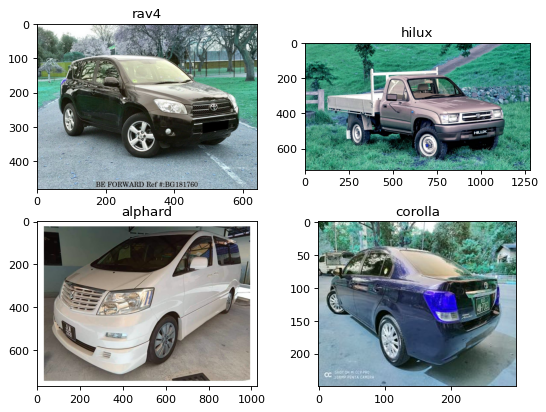

In [ ]:
rav4 = random.choice(car_dict['rav4'])
hilux = random.choice(car_dict['hilux'])
alphard = random.choice(car_dict['alphard'])
corolla = random.choice(car_dict['corolla'])


rav4 = cv2.imread(rav4)
hilux = cv2.imread(hilux)
alphard = cv2.imread(alphard)
corolla = cv2.imread(corolla)

from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

plt.subplot(2,2,1)
plt.title("rav4")
plt.imshow(rav4)


plt.subplot(2,2,2)
plt.title("hilux")
plt.imshow(hilux)

plt.subplot(2,2,3)
plt.title("alphard")
plt.imshow(alphard)

plt.subplot(2,2,4)
plt.title("corolla")
plt.imshow(corolla)

plt.show()


In [ ]:
target_img_size = (256,256)
all_X = []
all_Y = []

In [ ]:
from tqdm import tqdm
all_X = []
all_Y = []

for key,value in car_dict.items():
  print(key)
  for car_img_path in tqdm(value):
    car_img= cv2.imread(car_img_path)
    if car_img is None:
      continue
    resized_car_img = cv2.resize(car_img,target_img_size)
    all_X.append(resized_car_img)
    all_Y.append(key)


rav4


100%|██████████| 1192/1192 [00:18<00:00, 65.05it/s] 


hilux


100%|██████████| 1102/1102 [00:15<00:00, 70.93it/s] 


alphard


100%|██████████| 1102/1102 [00:10<00:00, 109.90it/s]


crown


100%|██████████| 1166/1166 [00:11<00:00, 97.21it/s] 


corolla


100%|██████████| 1084/1084 [00:12<00:00, 83.95it/s] 


## Convert to onehot encoder

In [ ]:
print("all_X : ",len(all_X))
print("all_Y : ",len(all_Y))

all_X :  5641
all_Y :  5641


In [ ]:
all_new_Y = []
for y_label  in all_Y:
  temp = []
  temp.append(y_label)
  all_new_Y.append(temp)
print(all_new_Y[:10])

[['rav4'], ['rav4'], ['rav4'], ['rav4'], ['rav4'], ['rav4'], ['rav4'], ['rav4'], ['rav4'], ['rav4']]


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
transformed = ohe.fit_transform(all_new_Y)
onehot_X = transformed.toarray()

In [ ]:
print(onehot_X[:10])

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPool2D,Dropout


input_shape = (256, 256, 3)
model = Sequential([
    Conv2D(32,kernel_size=(3,3),activation = 'relu', padding = 'same',input_shape = input_shape),
    Conv2D(32,kernel_size=(3,3),activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (2,2)),
   
    
    Conv2D(64,kernel_size=(3,3),activation = 'relu', padding = 'same'),
    Conv2D(64,kernel_size=(3,3),activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (2,2)),

    Flatten(),
    Dense(128,activation = 'relu'),

    Dense(5,activation = 'softmax')   
])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                    

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
len(all_X)

5641

In [ ]:
amount = 4000
train_X = np.array(all_X)[:amount]
train_Y = onehot_X[:amount]
test_X = np.array(all_X)[amount:]
test_Y = onehot_X[amount:]




In [ ]:
histroy = model.fit(
    x = np.array(all_X),
    y = onehot_X,
    validation_data = (test_X,test_Y),
    batch_size=16,
    epochs=10,
    verbose=1

)

Epoch 1/10
353/353 [==============================] - 51s 103ms/step - loss: 21.3353 - accuracy: 0.3345 - val_loss: 1.1231 - val_accuracy: 0.5673
Epoch 2/10
353/353 [==============================] - 36s 101ms/step - loss: 0.9155 - accuracy: 0.6586 - val_loss: 0.3931 - val_accuracy: 0.8397
Epoch 3/10
353/353 [==============================] - 34s 97ms/step - loss: 0.3478 - accuracy: 0.8816 - val_loss: 0.1150 - val_accuracy: 0.9634
Epoch 4/10
353/353 [==============================] - 33s 94ms/step - loss: 0.1340 - accuracy: 0.9589 - val_loss: 0.0640 - val_accuracy: 0.9835
Epoch 5/10
353/353 [==============================] - 33s 93ms/step - loss: 0.0776 - accuracy: 0.9812 - val_loss: 0.0391 - val_accuracy: 0.9866
Epoch 6/10
353/353 [==============================] - 37s 104ms/step - loss: 0.0223 - accuracy: 0.9926 - val_loss: 0.0272 - val_accuracy: 0.9921
Epoch 7/10
353/353 [==============================] - 33s 95ms/step - loss: 0.0279 - accuracy: 0.9943 - val_loss: 0.1092 - val_accur